# Tarea N°1 - Computación Científica y Ciencia de Datos
## Vectorización en Python: Proyección 3D en una malla 2D
#### Semestre N°1 - 2024
**Alumno: Israel Arias Panez**

**Profesor: Pablo Román Asenjo**


---



#Introducción

En este trabajo, el objetivo es desarrollar un programa vectorizado en Python que pueda ejecutarse de manera eficiente, buscando lograr una velocidad de ejecución considerablemente mayor que la de un programa escrito de manera convencional.

Para poner en práctica la construcción de programas vectorizados, nos centraremos en resolver un problema específico: la proyección de un conjunto de mediciones dispersas en un plano 3D sobre una malla 2D. Este problema surge cuando se intenta visualizar datos medidos en un volumen de forma bidimensional.

Para lograr este propósito, es necesario contar con un plano tridimensional que contenga $V_k$, que son mediciones tomadas en diversas ubicaciones dentro del volumen 3D, junto con un peso estadístico $w_k$. Al proyectar estos datos en un plano de dos dimensiones, obtenemos una tabla de coordenadas $x_k$ e $y_k$. En este punto, se aplica el procedimiento de _"gridding"_, el cual implica estimar los valores de $V$ para cada píxel en una malla bidimensional. Este proceso es fundamental para la visualización final de los datos.

La ecuación N°1 representa la operación de gridding en el plano 2d, en donde $V_{ij}^{G}$ es una medición del valor calculado para un punto de la grilla (o pixel) $i,j$. Este valor calculado corresponde al promedio ponderado de los valores vecinos ubicados a un radio menor o igual que $r$. $A_{ij}^{r}$ corresponde al conjunto de ubicaciones con índices $k$ que se encuentran a una distancia menor que $r$.

Ecuación N°1: $V_{ij}^{G}= \frac {\sum_{k \in A_{ij}^{r}} w_{k} V_{k}}{\sum_{k \in A_{ij}^{r}} w_ {k}}$

Con el objetivo de ejemplificar de mejor forma el problema en la Imagen N°1 es posible visualizar la proyección de puntos en un plano 3D a uno 2D de forma gráfica.

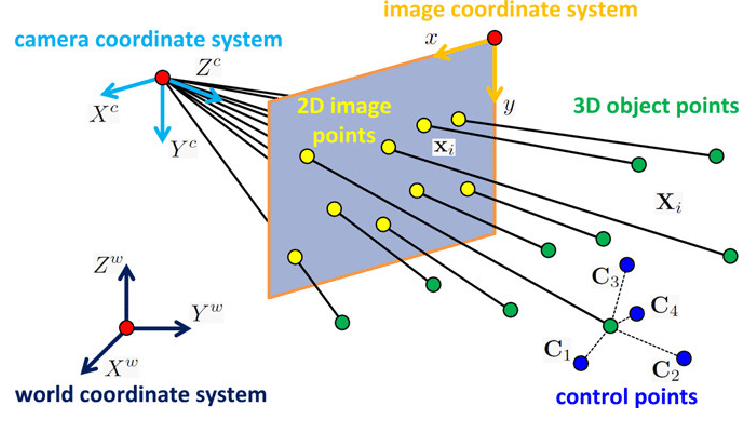

Imagen N°1 - Fuente: https://www.researchgate.net/profile/Boris-Jutzi/publication/251610120

Una vez se cuente con el plano 2D, es necesario ejecutar el proceso de gridding, el cual se puede ver ejemplificado en la Imagen N°2, en donde a cada píxel i,j se calculara su valor promedio, obteniendo finalmente la imagen que se busca como resultado.


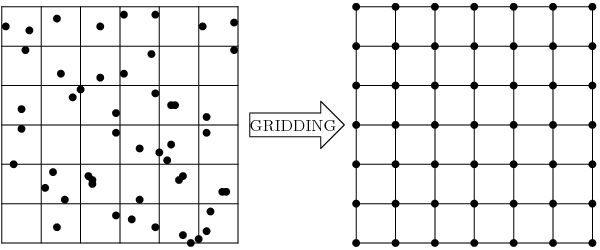

Imagen N°2 - Fuente: https://gdal.org/tutorials/gdal_grid_tut.html

En las Imágenes N°3 y N°4 es posible observar otro ejemplo de gridding, en donde en un plano 2d con mediciones visible en la Imagen N°3 se le aplica la operación de gridding, dando como resultado la imagen observable en la Imagen N°4.

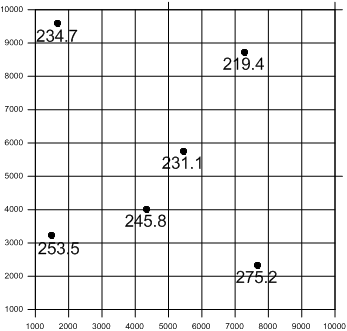

Imagen N°3 - Fuente: https://surferhelp.goldensoftware.com/gridmisc/gridding_example.htm

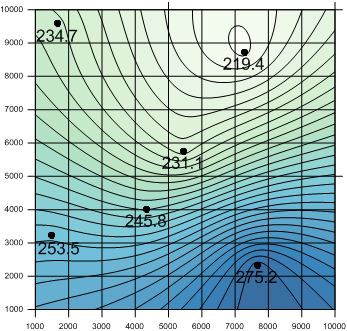

Imagen N°4 - Fuente: https://surferhelp.goldensoftware.com/gridmisc/gridding_example.htm

Entonces surgen como metas para resolver el problema el lograr la implementación de una funcionalidad que permita la proyección de un plano 3D a uno 2D, junto a la función de gridding para aplicar en el plano 2D. Sumado a esto y como el objetivo de esta experiencia es la creación de un programa vectorizado con el fin de estudiar el aumento en el tiempo de ejecución, también se harán pruebas al programa usando numpy y cupy, además de una implementación con loops tradicionales de Python. La librería cupy se caracteriza por ser una implementación de la librería numpy, pero que cuenta con aceleración por GPU, al ejecutarse en esta.

Una vez presentados los detalles y el problema a tratar en esta experiencia, se establecen los _objetivos del trabajo_.





##Objetivos

*   Implementar funciones vectorizadas utilizando la técnica de broadcasting.

*   Implementar la proyección de 3D a 2D como una función, utilizando la técnica de broadcasting, sin utilizar loops.

*   Implementar la operación de gridding sobre los puntos proyectados en el plano 2D, utilizando la técnica de broadcasting, sin utilizar loops.

*   Realizar una comparación de tiempo de ejecución entre las librerías cupy, numpy y una implementación basadas en ciclos de Python, para una distribución inicial 3D terminando con una graficación de los resultados de la operación gridding.

*   Análisis y conclusión de los resultados conseguidos.

---

#Desarrollo

En primer lugar se importan las librerías necesarias para la ejecución del programa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp

## Proyección 3D a 2D

El primer problema a abordar es la proyección de puntos en un plano 3D a un plano 2D. En el enunciado del problema se solicita la creación de una función que reciba los arreglos de las posiciones 3D, los ángulos $\alpha$ y $\beta$, y retorne arreglos que representan las proyecciones a coordenadas 2D de las mediciones anteriores. Además, se menciona que para encontrar los valores de x e y, se debe efectuar el producto punto entre los puntos 3D y los vectores unitarios $\hat{x}$ e $\hat{y}$ , estos vectores unitarios están definidos como:

 $\hat{x} = [cos(\alpha)cos(\beta),sin(\alpha)cos(\beta),-sin(\beta)]$

$\hat{y} = [-sin(\alpha),cos(\alpha),0]$

Tomando todo esto en consideración se implementa la siguiente función para proyectar puntos 3D a 2D:

In [ ]:
# Entrada: Un plano 3D, angulo alfa, angulo beta
# Objetivo: Proyectar en un plano 2D los puntos del plano 3D, considerando los
# angulos del observador en radianes
# Salida: los ejes x,y del plano 2D con las mediciones conseguidas
def projectTo2D(projection3d, alpha, beta):
    # Se definen los vectores unitarios
    x_hat = np.array([np.cos(alpha)*np.cos(beta), np.sin(alpha)*np.cos(beta),
                      -np.sin(beta)])
    y_hat = np.array([-np.sin(alpha), np.cos(alpha), 0])

    # Calcular las proyecciones
    x = np.dot(projection3d, x_hat)
    y = np.dot(projection3d, y_hat)

    return x, y

Como es posible observar, esta función recibe un arreglo con las posiciones en 3D y los ángulos alfa y beta, retornando x e y, los arreglos que componen el plano 2D.

Cabe destacar que para esta función hay una mejora en la eficiencia al utilizar la técnica de broadcasting, la cual se utiliza específicamente en las operaciones de producto punto:

```
np.dot(projection3d, x_hat)
np.dot(projection3d, y_hat)
```
Las cuales pueden ser calculadas con ciclos de python, pero perderían eficiencia.


Con el objetivo de verificar el funcionamiento correcto de la función implementada, se realiza el siguiente experimento:

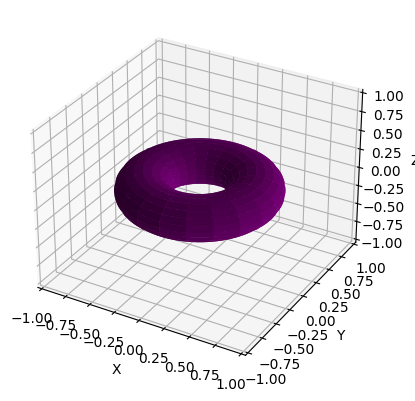

In [ ]:
puntos = 100

theta = np.linspace(0, 2.*np.pi, puntos)
phi = np.linspace(0, 2.*np.pi, puntos)
theta, phi = np.meshgrid(theta, phi)
c, a = 0.5, 0.25

xd = (c + a*np.cos(theta)) * np.cos(phi)
yd = (c + a*np.cos(theta)) * np.sin(phi)
zd = a * np.sin(theta)

# Graficar la figura
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.plot_surface(xd, yd, zd, rstride=5, cstride=5, color='purple')

# Setear labels de los ejes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

plt.show()

Se ha graficado una figura de un toroide (o dona) en 3 dimensiones, se cuenta con todos sus puntos en las variables *xd*, *yd* y *zd*. Se usaran estos puntos en la función *projectTo2D()* para probar su funcionamiento.

Se implementa una función que permite graficar en dos dimensiones:

In [ ]:
# Entrada: Ejes x,y con las mediciones de un plano 2D
# Objetivo: Graficar en un plano 2D las mediciones entrantes
def graficar2d(x,y):
    plt.scatter(x, y, c='purple', marker='o', s=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

Se convierte a 2d usando la función implementada, usando dos valores de ángulos distintas

In [ ]:
# Se agrupan las mediciones de la figura graficada en un solo arreglo que
# contiene las 3 dimensiones
donut3D = np.array([xd, yd, zd]).T
# Se convierten a 2d usando la función implementada
#En este caso los angulos corresponden a 90 y 0
x1,y1 = projectTo2D(donut3D, np.pi/2, 0)
# En este caso los angulos corresponden a 90 y 90
x2,y2 = projectTo2D(donut3D, np.pi/2, np.pi/2)

Se grafican las transformaciones efectuadas:

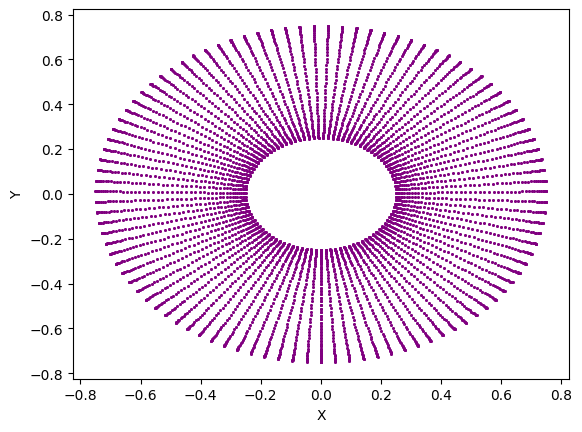

In [ ]:
graficar2d(x1,y1)

En este caso el objetivo era convertir a 2D la figura vista desde arriba, se consigue la figura esperada, como se puede verificar visualmente.

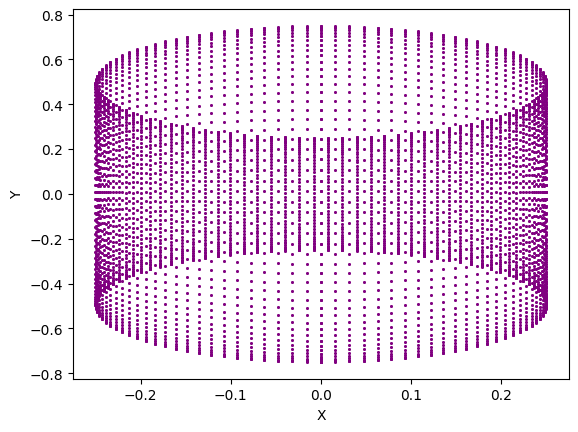

In [ ]:
graficar2d(x2,y2)

En este caso el objetivo era convertir a 2D la figura vista desde el lateral, se consigue la figura esperada, como se puede verificar visualmente.



Además se hará la verificación con la siguiente figura, para asegurar el correcto funcionamiento de la implementación:

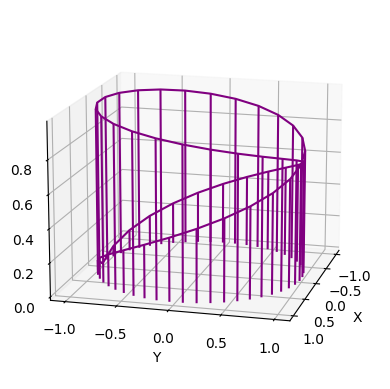

In [ ]:
theta = np.linspace(0, 4*np.pi)
xc = np.cos(theta - np.pi/2)
yc = np.sin(theta - np.pi/2)
zc = np.sin(theta/4)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xc, yc, zc, linefmt="purple", markerfmt="purple", basefmt="none")
ax.view_init(elev=15, azim=15)

# Setear Ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Cabe destacar que las líneas bajo la curva fueron agregadas para una mejor visualización, los puntos del plano 3D solo corresponden a la curva en sí.

Al igual que para la figura anterior, se generarán dos transformaciones cambiando los ángulos y se graficará la proyección 2D resultante:

In [ ]:
curva3d = np.array([xc, yc, zc]).T
x3,y3 = projectTo2D(curva3d,np.pi/2,0)
x4,y4 = projectTo2D(curva3d,np.pi/2,-np.pi/2)

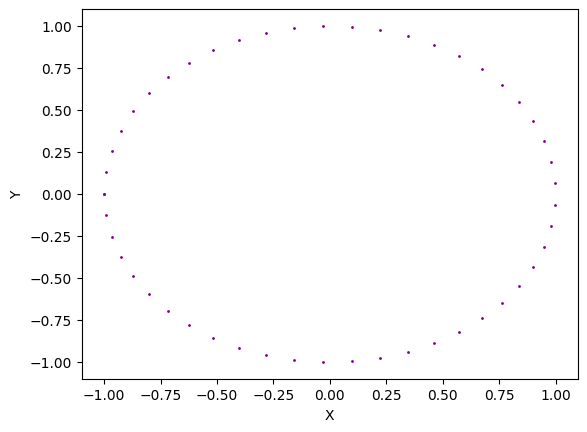

In [ ]:
graficar2d(x3,y3)

Es posible observar que la figura vista desde arriba da la forma de un óvalo, lo cual era el resultado esperado.

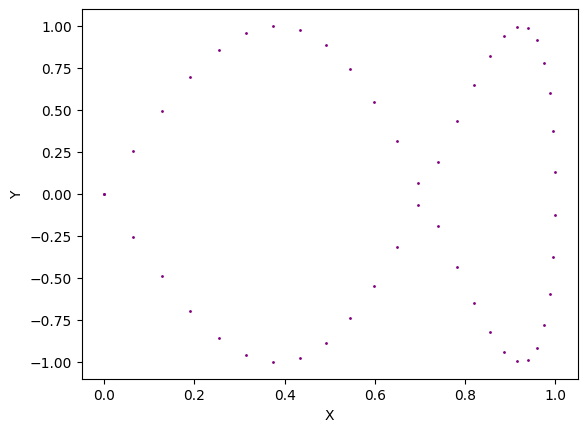

In [ ]:
graficar2d(x4,y4)

Para este caso se puede observar una curva similar al simbolo infinito, lo cual es la figura esperada, para poder verificar esto es posible el modificar el ángulo de visualización del plano 3D como se hará a continuación:

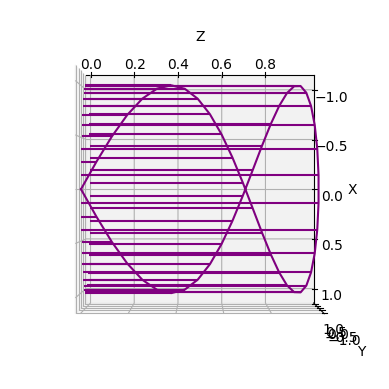

In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xc, yc, zc, linefmt="purple", markerfmt="purple", basefmt="none")

# Cambiar el ángulo de la vista
ax.view_init(elev=-90, azim=-90, vertical_axis="y")

# Setear Ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Y con esto es posible comprobar ambas proyecciones para esta figura.

Con los experimentos realizados es posible verificar el correcto funcionamiento de la función de proyección de 3D a 2D, por lo que es posible continuar al siguiente paso de la problemática que es la implementación de la función de gridding.

## Gridding


Para la implementación de gridding hay que recordar la explicación planteada en la introducción, la operación de gridding representada en la ecuación consiste en que a cada punto de la grilla (i,j) en dos dimensiones se asigna el valor de un promedio ponderado de los valores vecinos ubicados a un radio menor o igual que $r$.

Ecuación N°1 (Gridding): $V_{ij}^{G}= \frac {\sum_{k \in A_{ij}^{r}} w_{k} V_{k}}{\sum_{k \in A_{ij}^{r}} w_ {k}}$

Además, se toma en consideración la implementación sin loops usando Broadcasting

In [ ]:
# Entradas:
#   - Projection2D: Arreglo2D resultado de la proyección 3D->2D
#   - n: Cantidad de pixeles/Tamaño de la grilla
#   - dx: Ancho del pixel
#   - N: Cantidad de mediciones en el plano
#   - V: Arreglo de valores estimados
#   - w: Arreglo de pesos
#   - L: Limite de la grilla
# Objetivo: Efectuar la operación de gridding dado una proyección 2D
# Salida: Arreglo VG con el resultado de la operación de gridding
def gridding_numpy(projection2D,n,dx,N,V,w,L):
  r=2*dx #Se define el radio en base al ancho del pixel
  # Se extraen los valores de x e y de los ejes de la proyección 2D
  x = projection2D[:, 0]
  y = projection2D[:, 1]
  #del projection2D # Se libera para ahorrar memoria

  # Construccion de grilla de pixeles
  # Se generan las posiciones en la grilla/pixeles
  X = np.linspace(-L,L,n)
  Y = np.linspace(-L,L,n)

  # Para aplicar Broadcasting, se transforman las dimensiones
  # Modificacion de dimensiones de las mediciones entrantes
  x=np.reshape(x,(1,1,N))
  y=np.reshape(y,(1,1,N))
  w=np.reshape(w,(1,1,N))
  V=np.reshape(V,(1,1,N))

  # Modificacion de dimensiones de la grilla
  X=np.reshape(X,(n,1,1))
  Y=np.reshape(Y,(1,n,1))

  #Se inicializan arreglos en cero que contendrán el resultado de la operación
  #de sumas aprovechando el Broadcasting
  Sw = np.zeros(shape=(n,n)) # Suma de las mediciones ponderadas en la grilla
  S =  np.zeros(shape=(n,n)) # Suma de los pesos

  #A continuación, se empiezan a efectuar los cálculos
  #siguiendo la fórmula de gridding

  # B es igual a un arreglo booleano de dimensiones (n,n,N), el cual
  # contiene true si el punto i,j tiene como dato cercano a k dentro del rango
  # del radio r
  B = (X-x)**2 + (Y-y)**2 <= r**2

  K = V*w # Tiene una dimensión de (1,1,N)

  A1 = K*B
  A2 = w*B

  # Se suma en el eje 2, lo que permite sumar todos aquellos valores cercanos
  # a la posición i,j en la dimensión de los datos
  Sw = np.sum(A1,axis=2)
  S = np.sum(A2,axis=2)

  # Se liberan para ahorrar memoria
  del B
  del A1
  del A2
  #mempool=cp.get_default_memory_pool()
  #mempool.free_all_blocks()

  VG = Sw/S
  VG[S==0] = 0 # Eliminación de valores NaN

  return VG

Cabe destacar que esta es una implementación con numpy, posteriormente se implementará una versión con cupy y una versión con loops tradicionales.

Como es posible observar, una de las entradas para la función de gridding es el vector de mediciones V. Para obtener este vector, se tiene la siguiente función mockImage(), la cual genera mediciones de acuerdo a las coordenadas de un plano 3D que se le entregan.

Nota: Esta función fue mostrada en clases y fue modificada para funcionar en 3 dimensiones.


In [ ]:
# Entrada: Valores de una coordenada especifica en 3 Dimensiones
# Objetivo: Generar una Medición dadas las coordenadas
# Salida: Arreglo V que contiene todas las mediciones generadas
def mockImage(x,y,z):
  rr = x**2 + y**2 + z**2
  v = (np.sin(rr/0.001/np.pi))*np.exp(-rr*rr/0.006)/2.0
  v[v<0.]=0.0
  return v

Para probar el correcto funcionamiento de la función de gridding, se efectuarán unos experimentos, en donde se aprovechará las figuras usadas en el experimento anterior para también probar esta implementación.

En primera instancia se probará la figura del toroide/dona, en donde se tienen sus mediciones en 3 dimensiones, por lo que se fijarán los parámetros restantes necesarios para efectuar gridding y se generará el arreglo de mediciones V.


In [ ]:
n = 256 # Tamaño de la grilla/Cantidad de pixeles
L = 1 #Limite de la grilla
dx=2*L/n # Ancho del pixel
N = puntos**2 # Cantidad de mediciones, se toma de base la cantidad de puntos
# Con los que se genero la dona

# Se ajustan las mediciones en 3D
donut3D = np.array([xd, yd, zd]).T
donut3D = donut3D.reshape(-1, donut3D.shape[-1])
# Se generan las mediciones V, se suma 0.1 para resaltar el resultado
V = mockImage(donut3D[:, 0],donut3D[:, 1],donut3D[:, 2]) + 0.1
# Se generan los pesos de las mediciones
w = 1+np.random.uniform(low=-0.1, high=0.1, size=(N))
# Se convierten a 2d usando la función implementada anteriormente
#En este caso los angulos corresponden a 90 y 0
x1,y1 = projectTo2D(donut3D, np.pi/2, 0)
donut2d = np.column_stack((x1.flatten(), y1.flatten()))
# Se aplica la función de gridding
matrizDonut = gridding_numpy(donut2d,n,dx,N,V,w,L)

<ipython-input-13-d00c30c9060c>:64: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


Aplicada la función de gridding se gráfica el resultado:

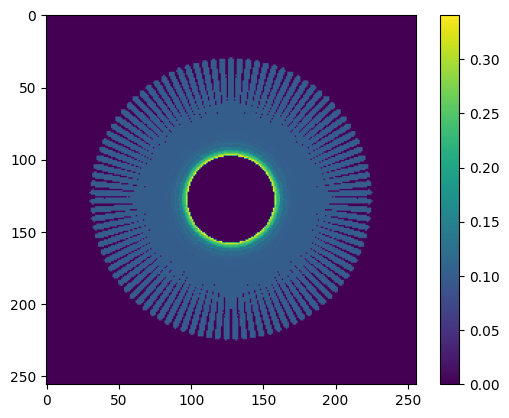

In [ ]:
fig = plt.figure()
img = plt.imshow(matrizDonut.T)
fig.colorbar(img)

Es posible ver que se consigue una figura en donde se asigna un color más "amarillo" al centro, para ir disminuyendo en los bordes (de acuerdo con la simbología de colores de la paleta derecha). Al comparar este resultado con su plano en 2d, se observa que se tiene una mayor concentración de puntos al centro de la figura, lo que concuerda con el resultado mostrado en gridding, además que su concentración de puntos disminuye en los bordes, lo que también se muestra acá, por ende, el resultado es el esperado.

Se repetirá el experimento con el toroide/dona, pero con la proyección lateral mostrada anteriormente.

In [ ]:
# Se convierten a 2d usando la función implementada
#En este caso los angulos corresponden a 90 y 0
x2,y2 = projectTo2D(donut3D, np.pi/2, np.pi/2)

donut2d = np.column_stack((x2.flatten(), y2.flatten()))
# Se aplica gridding
matrizDonutB = gridding_numpy(donut2d,n,dx,N,V,w,L)

<ipython-input-13-d00c30c9060c>:64: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


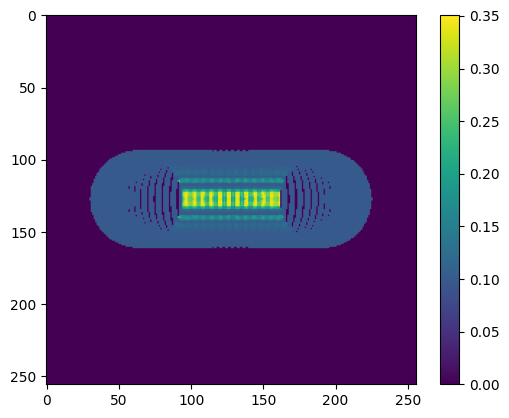

In [ ]:
fig = plt.figure()
img = plt.imshow(matrizDonutB)
fig.colorbar(img)

En este caso, se observa una mayor concentración de puntos al centro y una menor concentración a los bordes, lo cual al comparar con la proyección en 2D concuerda el resultado, por lo qué es el resultado esperado.

Además, se realizará el experimento con la curva mostrada anteriormente, con el fin de validar el resultado que arroja la función de gridding:

In [ ]:
#Se definen parámetros para aplicar gridding
n = 256 # Tamaño de la grilla/Cantidad de pixeles
L = 1 #Limite de la grilla
dx=2*L/n # Ancho del pixel
# Se consigue el plano 3D de la curva
curva3d = np.array([xc, yc, zc]).T
# Se generan las mediciones V se suma 0.1 para resaltar el resultado
V = mockImage(curva3d[:, 0],curva3d[:, 1],curva3d[:, 2]) + 0.1
# Se proyecta a 2 dimensiones ocupando la función implementada
x3,y3 = projectTo2D(curva3d,np.pi/2,0)
x4,y4 = projectTo2D(curva3d,np.pi/2,-np.pi/2)
#Se combinan los resultados de los ejes
curva2dA = np.column_stack((x3, y3))
curva2dB = np.column_stack((x4, y4))

N = len(curva2dA) # Cantidad de mediciones
# Se generan los pesos de las mediciones
w = 1+np.random.uniform(low=-0.1, high=0.1, size=(N))

# Se aplica gridding
matrizCurvaA = gridding_numpy(curva2dA,n,dx,N,V,w,L)
# Se aplica gridding a la segunda curva
matrizCurvaB = gridding_numpy(curva2dB,n,dx,N,V,w,L)

<ipython-input-13-d00c30c9060c>:64: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


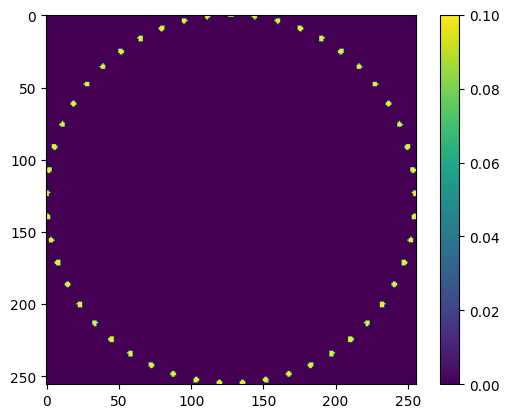

In [ ]:
fig = plt.figure()
img = plt.imshow(matrizCurvaA)
fig.colorbar(img)

Para este caso es posible observar que se consigue la figura esperada al compararla a su grafico en 2 dimensiones observado desde arriba.

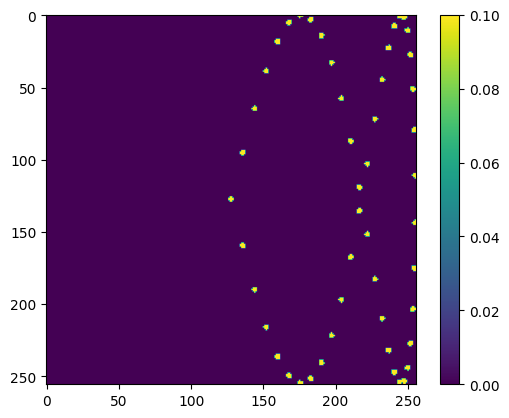

In [ ]:
fig = plt.figure()
img = plt.imshow(matrizCurvaB.T)
fig.colorbar(img)

En este caso también es posible observar que se consigue la imagen esperada si se compara a su versión 2D, cabe destacar que se transpuso la matriz de resultados para rotar la imagen y que se vea de la misma forma que en la versión 2D graficada anteriormente, dado que imshow trabaja las cooordenadas de forma distinta a scatter (se adjunta link). Esto no fue realizado en las imágenes anteriores debido a qué eran figuras que, al invertir sus ejes, no cambiaban su grafico debido a la naturaleza de su forma.

https://stackoverflow.com/questions/75235652/why-does-plt-imshow-flip-coordinates-compared-to-plt-scatter


Finalmente, al haber conseguido los resultados esperados en todas las pruebas ejecutadas, se da por verificada la implementación de gridding.


---



## Comparación tiempos de ejecución

El siguiente paso en el desarrollo de esta experiencia es la de realizar una comparación de tiempos de ejecución entre numpy, cupy y una implementación con loops por default de Python ante un mismo escenario, para ello se implementarán las funciones faltantes:

Se implementa la función de gridding con cupy, es posible observar que es idéntica a la función anterior, solo que se ejecutan todas las operaciones en la librería cupy, además se suman un par de líneas de código que ayudan a liberar memoria de la gpu, lo cual es necesario en el entorno de collab.

In [ ]:
# Entradas:
#   - Projection2D: Arreglo2D resultado de la proyección 3D->2D
#   - n: Cantidad de pixeles/Tamaño de la grilla
#   - dx: Ancho del pixel
#   - N: Cantidad de mediciones en el plano
#   - V: Arreglo de valores estimados
#   - w: Arreglo de pesos
#   - L: Limite de la grilla
# Objetivo: Efectuar la operación de gridding dado una proyección
#           2D version cupy
# Salida: Arreglo VG con el resultado de la operación de gridding
def gridding_cupy(projection2D,n,dx,N,V,w,L):
  r = 2*dx #Se define el radio en base al ancho del pixel
  # Se extraen los valores de x e y de los ejes de la proyección 2D
  x = projection2D[:, 0]
  y = projection2D[:, 1]
  #del projection2D # Se libera para ahorrar memoria

  # Construccion de grilla de pixeles
  # Se generan las posiciones en la grilla/pixeles
  X = cp.linspace(-L,L,n)
  Y = cp.linspace(-L,L,n)

  # Para aplicar Broadcasting, se transforman las dimensiones
  # Modificacion de dimensiones de las mediciones entrantes
  x = cp.reshape(x,(1,1,N))
  y = cp.reshape(y,(1,1,N))
  w = cp.reshape(w,(1,1,N))
  V = cp.reshape(V,(1,1,N))

  # Modificacion de dimensiones de la grilla
  X = cp.reshape(X,(n,1,1))
  Y = cp.reshape(Y,(1,n,1))

  #Se inicializan arreglos en cero que contendrán el resultado de la operación
  #de sumas aprovechando el Broadcasting
  Sw = cp.zeros(shape=(n,n)) # Suma de las mediciones ponderadas en la grilla
  S =  cp.zeros(shape=(n,n)) # Suma de los pesos

  #A continuación, se empiezan a efectuar los cálculos
  #siguiendo la fórmula de gridding

  # B es igual a un arreglo booleano de dimensiones (n,n,N), el cual
  # contiene true si el punto i,j tiene como dato cercano a k dentro del rango
  # del radio r
  B = (X-x)**2 + (Y-y)**2 <= r**2

  K = V*w # Tiene una dimensión de (1,1,N)

  A1 = K*B
  A2 = w*B

  # Se suma en el eje 2, lo que permite sumar todos aquellos valores cercanos
  # a la posición i,j en la dimensión de los datos
  Sw = cp.sum(A1,axis=2)
  S = cp.sum(A2,axis=2)

  # Se liberan para ahorrar memoria
  del B
  del A1
  del A2
  mempool=cp.get_default_memory_pool()
  mempool.free_all_blocks()

  VG = Sw/S
  VG[S==0] = 0 # Eliminación de valores NaN

  return VG

Además, con el objetivo de hacer una medición justa del tiempo, se reimplementan las funciones mockImage y projectTo2D para que se ejecuten ocupando cupy al momento de hacer el benchmark.

In [ ]:
# Entrada: Valores de una coordenada especifica en 3 Dimensiones
# Objetivo: Generar una Medición dadas las coordenadas versión cupy
# Salida: Arreglo V que contiene todas las mediciones generadas
def mockImagecupy(x,y,z):
  rr = x**2 + y**2 + z**2
  v = (cp.sin(rr/0.001/np.pi))*cp.exp(-rr*rr/0.006)/2.0
  v[v<0.]=0.0
  return v

In [ ]:
# Entrada: Un plano 3D, angulo alfa, angulo beta
# Objetivo: Proyectar en un plano 2D los puntos del plano 3D, considerando los
# angulos del observador en radianes, versión cupy
# Salida: los ejes x,y del plano 2D con las mediciones conseguidas
def projectTo2Dcupy(projection3d, alpha, beta):
    # Se definen los vectores unitarios
    x_hat = cp.array([cp.cos(alpha)*cp.cos(beta), cp.sin(alpha)*cp.cos(beta),
                      -cp.sin(beta)])
    y_hat = cp.array([-cp.sin(alpha), cp.cos(alpha), cp.array(0)])

    # Calcular las proyecciones
    x = cp.dot(projection3d, x_hat)
    y = cp.dot(projection3d, y_hat)

    return x, y

Finalmente se implementa la función de gridding sin hacer uso de la técnica de broadcasting, sino que realiza los cálculos iterando con ciclos for.

In [ ]:
# Entradas:
#   - Projection2D: Arreglo2D resultado de la proyección 3D->2D
#   - n: Cantidad de pixeles/Tamaño de la grilla
#   - dx: Ancho del pixel
#   - N: Cantidad de mediciones en el plano
#   - V: Arreglo de valores estimados
#   - w: Arreglo de pesos
#   - L: Limite de la grilla
# Objetivo: Efectuar la operación de gridding dado una proyección
#           2D sin broadcasting
# Salida: Arreglo VG con el resultado de la operación de gridding
def gridding_no_broadcast(projection2D,n,dx,N,V,w,L):
    r=2*dx #Se define el radio en base al ancho del pixel
    # Se extraen los valores de x e y de los ejes de la proyección 2D
    x = projection2D[:, 0]
    y = projection2D[:, 1]

    # Construccion de grilla de pixeles
    # Se generan las posiciones en la grilla/pixeles
    X = np.linspace(-L,L,n)
    Y = np.linspace(-L,L,n)

    #Se inicializan arreglos en cero que contendrán el resultado de la operación
    Sw = np.zeros(shape=(n,n)) # Suma de las mediciones ponderadas en la grilla
    S =  np.zeros(shape=(n,n)) # Suma de los pesos

    #A continuación, se empiezan a efectuar los cálculos
    #siguiendo la fórmula de gridding, sin broadcasting usando ciclos for
    for i in range(n):
        for j in range(n):
            for k in range(N):
                if (X[i]-x[k])**2 + (Y[j]-y[k])**2 <= r**2:
                    Sw[i][j] += V[k]*w[k]
                    S[i][j] += w[k]

    VG = Sw/S
    VG[S==0] = 0 # Eliminación de valores NaN

    return VG

### Verificación de funciones implementadas

Al igual que en las ocasiones anteriores, se realizará una prueba de estas implementaciones con los resultados ya conocidos, para verificar su correcta implementación, para este caso se probarán las funciones de griddin en cupy y en la implementación sin broadcasting de la última figura, o sea la figura de curva.

In [ ]:
# Prueba Cupy
theta = cp.linspace(0, 4*np.pi)
xc = cp.cos(theta - np.pi/2)
yc = cp.sin(theta - np.pi/2)
zc = cp.sin(theta/4)
curva3dcupy = cp.array([xc, yc, zc]).T

#Se definen parámetros para aplicar gridding
n = 256 # Tamaño de la grilla/Cantidad de pixeles
L = 1 #Limite de la grilla
dx=2*L/n # Ancho del pixel

# Se generan las mediciones V se suma 0.1 para resaltar el resultado
V = mockImage(curva3dcupy[:, 0],curva3dcupy[:, 1],curva3dcupy[:, 2]) + 0.1
# Se proyecta a 2 dimensiones ocupando la función implementada
x4,y4 = projectTo2Dcupy(curva3dcupy,cp.pi/2,-cp.pi/2)
#Se combinan los resultados de los ejes
curva2dBcupy = cp.column_stack((x4, y4))

N = len(curva2dBcupy) # Cantidad de mediciones
# Se generan los pesos de las mediciones
w = 1+cp.random.uniform(low=-0.1, high=0.1, size=(N))

# Se aplica gridding
matrizCurvacupy = gridding_cupy(curva2dBcupy,n,dx,N,V,w,L)

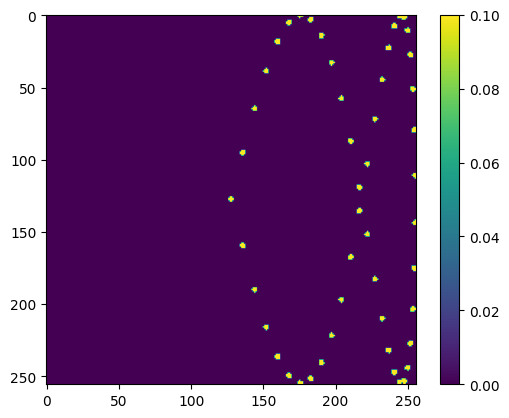

In [ ]:
fig = plt.figure()
img = plt.imshow(cp.asnumpy(matrizCurvacupy.T))
fig.colorbar(img)

Es posible observar que se consigue el mismo resultado ya comprobado anteriormente, por lo que la función cumple los resultados esperados.

In [ ]:
#Prueba sin broadcasting
theta = np.linspace(0, 4*np.pi)
xc = np.cos(theta - np.pi/2)
yc = np.sin(theta - np.pi/2)
zc = np.sin(theta/4)

# Se consigue el plano 3D de la curva
curva3d = np.array([xc, yc, zc]).T
# Se generan las mediciones V se suma 0.1 para resaltar el resultado
V = mockImage(curva3d[:, 0],curva3d[:, 1],curva3d[:, 2]) + 0.1
# Se proyecta a 2 dimensiones ocupando la función implementada
x4,y4 = projectTo2D(curva3d,np.pi/2,-np.pi/2)
#Se combinan los resultados de los ejes
curva2dfor = np.column_stack((x4, y4))

N = len(curva2dfor) # Cantidad de mediciones
# Se generan los pesos de las mediciones
w = 1+np.random.uniform(low=-0.1, high=0.1, size=(N))

# Se aplica gridding
matrizCurvaBe = gridding_no_broadcast(curva2dfor,n,dx,N,V,w,L)

<ipython-input-33-f06f351d0689>:36: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


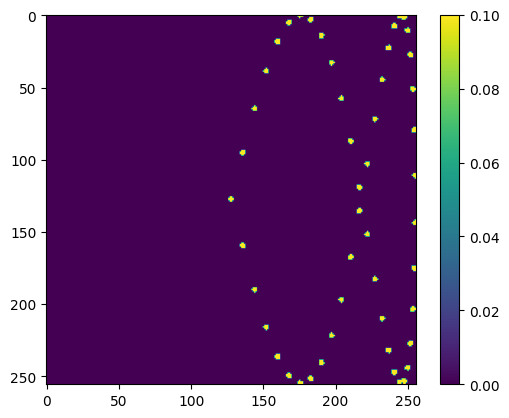

In [ ]:
fig = plt.figure()
img = plt.imshow(matrizCurvaBe.T)
fig.colorbar(img)

Para el caso sin broadcasting, es posible observar que también llega al mismo resultado esperado, por lo que también se comprueba que la función está bien implementada.


---



### Benchmark

Para hacer una comparación justa, las tres funciones de gridding deben pasar por el mismo experimento, en el experimento se generarán N puntos aleatorios en un plano 3D. Estos puntos se proyectarán en 2D utilizando la función de proyección 2D implementada en esta experiencia, para finalmente aplicar la función de cálculo de gridding y mostrar la imagen resultante. En los tres casos se debiese llegar a una imagen similar, se registrarán los tiempos de ejecución de cada experimento

In [ ]:
def benchmark_numpy_gridding():
  n = 256 #Cantidad de pixeles/Tamaño de la grilla
  N = 10000 #Numero de mediciones a generar
  L = 1 #Limite de la grilla
  dx = 2*L/n #Ancho del pixel en la grilla

  # Se generan las mediciones en el plano 3D
  # Se crean los 3 vectores de coordenadas de las mediciones, usando
  # una función random uniforme entre -1 y 1
  X = np.random.uniform(low=-L, high=L, size=(3*N))
  # Se cambia la forma para tener las filas de mediciones en 3 coodenadas (N,3)
  X = np.reshape(X, (N,3))
  # Se generan los valores de cada medición
  V = mockImage(X[:, 0],X[:, 1],X[:, 2])+0.05
  # Se generan los pesos de las mediciones
  w = 1+np.random.uniform(low=-0.1, high=0.1, size=(N))

  # Se realiza la proyección a 2D, se fija la vista desde arriba
  x,y = projectTo2D(X, np.pi/2, 0)

  # Se combinan los ejes X e Y en una sola variable de 2 dimensiones
  proyeccion2D = np.column_stack((x, y))

  # Se realiza la operación de gridding
  matrizPromedioPonderado = gridding_numpy(proyeccion2D,n,dx,N,V,w,L)

  # Se grafica y muestra la imagen resultante
  fig = plt.figure()
  img = plt.imshow(matrizPromedioPonderado)
  plt.title("Benchmark Usando Numpy")
  fig.colorbar(img)


In [ ]:
def benchmark_cupy_gridding():
  n = 256 #Cantidad de pixeles/Tamaño de la grilla
  N = 10000 #Numero de mediciones a generar
  L = 1 #Limite de la grilla
  dx = 2*L/n #Ancho del pixel en la grilla

  # Se generan las mediciones en el plano 3D
  # Se crean los 3 vectores de coordenadas de las mediciones, usando
  # una función random uniforme entre -1 y 1
  X = cp.random.uniform(low=-L, high=L, size=(3*N))
  # Se cambia la forma para tener las filas de mediciones en 3 coodenadas (N,3)
  X = cp.reshape(X, (N,3))
  # Se generan los valores de cada medición, usando cupy
  V = mockImagecupy(X[:, 0],X[:, 1],X[:, 2])+0.05
  # Se generan los pesos de las mediciones
  w = 1+cp.random.uniform(low=-0.1, high=0.1, size=(N))

  # Se realiza la proyección a 2D, se fija la vista desde arriba, usando cupy
  x,y = projectTo2Dcupy(X, cp.pi/2, 0)

  # Se combinan los ejes X e Y en una sola variable de 2 dimensiones
  proyeccion2D = cp.column_stack((x, y))

  # Se realiza la operación de gridding
  matrizPromedioPonderado = gridding_cupy(proyeccion2D,n,dx,N,V,w,L)

  # Se grafica y muestra la imagen resultante
  fig = plt.figure()
  img = plt.imshow(cp.asnumpy(matrizPromedioPonderado))
  plt.title("Benchmark Usando Cupy")
  fig.colorbar(img)

In [ ]:
def benchmark_no_broadcast_gridding():
  n = 256 #Cantidad de pixeles/Tamaño de la grilla
  N = 10000 #Numero de mediciones a generar
  L = 1 #Limite de la grilla
  dx = 2*L/n #Ancho del pixel en la grilla

  # Se generan las mediciones en el plano 3D
  # Se crean los 3 vectores de coordenadas de las mediciones, usando
  # una función random uniforme entre -1 y 1
  X = np.random.uniform(low=-L, high=L, size=(3*N))
  # Se cambia la forma para tener las filas de mediciones en 3 coodenadas (N,3)
  X = np.reshape(X, (N,3))
  # Se generan los valores de cada medición
  V = mockImage(X[:, 0],X[:, 1],X[:, 2])+0.05
  # Se generan los pesos de las mediciones
  w = 1+np.random.uniform(low=-0.1, high=0.1, size=(N))

  # Se realiza la proyección a 2D, se fija la vista desde arriba
  x,y = projectTo2D(X, np.pi/2, 0)

  # Se combinan los ejes X e Y en una sola variable de 2 dimensiones
  proyeccion2D = np.column_stack((x, y))

  # Se realiza la operación de gridding
  matrizPromedioPonderado = gridding_no_broadcast(proyeccion2D,n,dx,N,V,w,L)

  # Se grafica y muestra la imagen resultante
  fig = plt.figure()
  img = plt.imshow(matrizPromedioPonderado)
  plt.title("Benchmark Usando Ciclos for")
  fig.colorbar(img)

Definidos los benchmark, se procede a su ejecución, registrando el tiempo de ejecución usando el macro %%time que posee collab.

<ipython-input-13-d00c30c9060c>:64: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


CPU times: user 4.04 s, sys: 3.28 s, total: 7.32 s
Wall time: 8.08 s


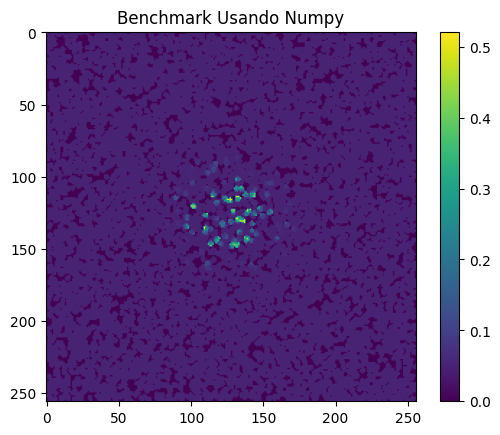

In [ ]:
# Benchmark numpy
%%time
benchmark_numpy_gridding()

CPU times: user 1.36 s, sys: 51.7 ms, total: 1.41 s
Wall time: 3.25 s


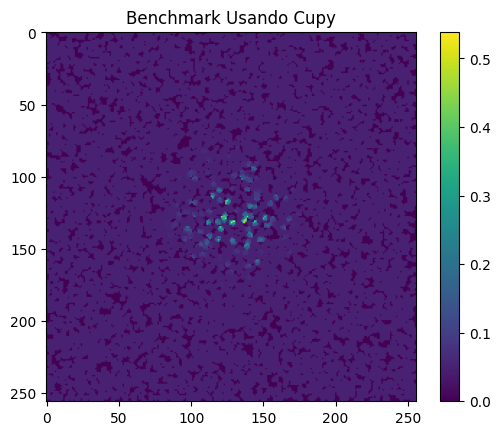

In [ ]:
# Benchmark cupy
%%time
benchmark_cupy_gridding()

<ipython-input-33-f06f351d0689>:36: RuntimeWarning: invalid value encountered in divide
  VG = Sw/S


CPU times: user 10min 26s, sys: 1.35 s, total: 10min 27s
Wall time: 10min 29s


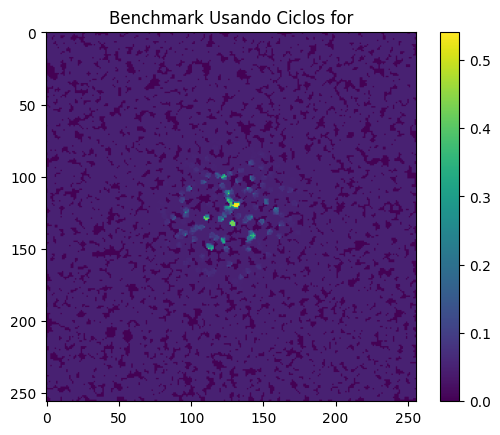

In [ ]:
# Benchmark sin broadcasting
%%time
benchmark_no_broadcast_gridding()

Tomando en consideración los tiempos totales de ejecución, se obtuvieron los siguientes resultados:


*   **numpy:** $7.32[s]$
*   **cupy:** $1.41[s]$
*   **ciclos for:** $627[s]$ $->$ $10$  $min$  $27[s]$



---



#Conclusiones

## Análisis de los resultados

Tomando en consideración los tiempos totales de ejecución obtenidos en el benchmark realizado, se obtuvieron los siguientes resultados, también presentados al final de la sección de desarrollo:

**Tiempos de ejecución totales:**

*   numpy: $7.32[s]$
*   cupy: $1.41[s]$
*   ciclos for: $627[s] \rightarrow 10$ minutos $27[s]$


Estos resultados resaltan claramente la eficiencia de las implementaciones vectorizadas utilizando numpy y cupy en comparación con la implementación basada en ciclos. Mientras que numpy mostró un rendimiento notablemente mejorado en comparación con los ciclos, cupy demostró una mejora aún más significativa, gracias a su capacidad para aprovechar la aceleración por GPU. Esta diferencia en el rendimiento destaca la importancia de seleccionar las herramientas adecuadas para aplicaciones que requieren un procesamiento intensivo de datos, donde la optimización del rendimiento y el tiempo es fundamental.



## Resumen de la experiencia

En este trabajo, se abordó el desafío de desarrollar un programa vectorizado en Python para mejorar la eficiencia computacional en la proyección de un conjunto de mediciones 3D en un plano 2D, seguido por la aplicación del proceso de gridding. Se implementaron funciones vectorizadas utilizando la técnica de broadcasting, lo que permitió realizar cálculos de manera eficiente y sin la necesidad de utilizar bucles explícitos.

La implementación de la proyección de 3D a 2D y la operación de gridding en el plano 2D se llevó a cabo sin la necesidad de utilizar bucles, aprovechando al máximo las capacidades de broadcasting de las librerías numpy y cupy. Este enfoque permitió procesar grandes conjuntos de datos de manera rápida y eficiente, lo que es crucial para aplicaciones que requieren un procesamiento intensivo de datos, como la visualización de datos

Para evaluar el rendimiento de las implementaciones, se realizaron pruebas comparativas de tiempo de ejecución entre las librerías numpy, cupy y una implementación basada en ciclos de Python estándar. Los resultados mostraron que las implementaciones vectorizadas utilizando numpy y cupy superaron significativamente en velocidad a la implementación basada en ciclos, con cupy destacándose especialmente debido a su capacidad para aprovechar la aceleración por GPU.

Además, al graficar los resultados de la operación de gridding, se pudo visualizar de manera efectiva cómo se distribuyen los datos proyectados en la imagen 2D, lo que proporciona una representación visual útil para el análisis de datos.

Finalmente, se puede concluir que todos los objetivos propuestos al inicio de este trabajo han sido cumplidos satisfactoriamente, desarrollando la experiencia en su totalidad. A su vez y para cerrar se destaca que este trabajo proporcionó una valiosa experiencia en el aprendizaje y aplicación de técnicas de programación vectorizada en Python para resolver problemas de procesamiento de datos intensivos, además de conocer y comprender problemáticas que surgen en la computación científica, como lo fue el problema tratado en esta experiencia.